In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train = pd.read_csv('Train.csv')
Test = pd.read_csv('Test.csv')

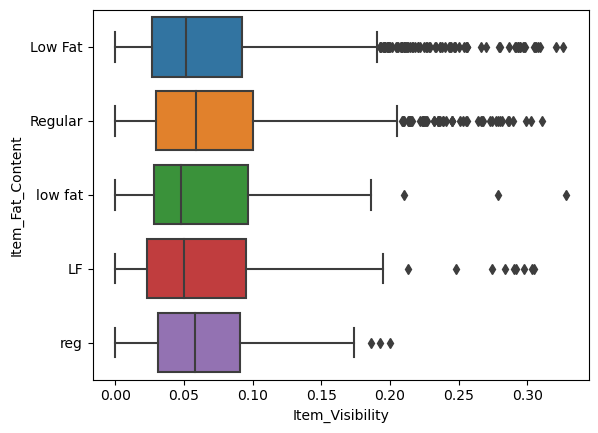

In [3]:
sns.boxplot(x = train['Item_Visibility'], y = train['Item_Fat_Content'])
plt.show()

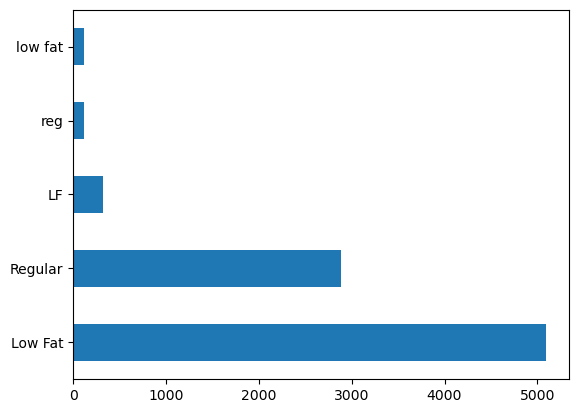

In [4]:
train['Item_Fat_Content'].value_counts().plot(kind='barh')
plt.show()

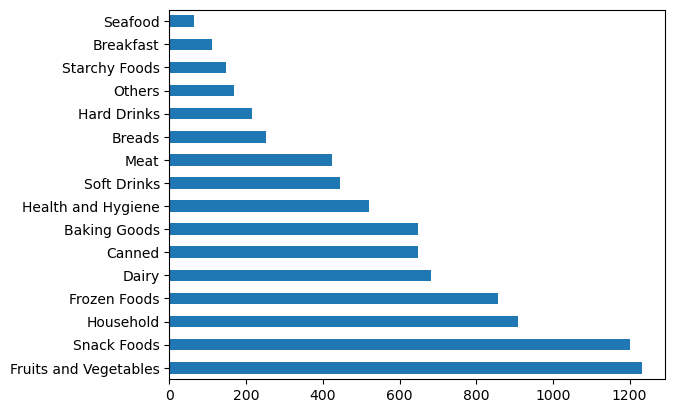

In [5]:
train['Item_Type'].value_counts().plot(kind='barh')
plt.show()

In [6]:
def data_prep(train):
  train['Item_Weight'] = np.where(train['Item_Weight'].isna(),train['Item_Weight'].median(skipna = True),train['Item_Weight'])
  train['Outlet_Size'] = np.where(train['Outlet_Size'].isna(),train['Outlet_Size'].mode()[0], train['Outlet_Size'])
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat', 'Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF', 'Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')
  train['YOB'] = 2023 - train['Outlet_Establishment_Year']
  return train

In [7]:
train_new = data_prep(train)

In [8]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [9]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
pd.crosstab(train_new['Outlet_Size'], train_new['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


In [11]:
pd.crosstab(train_new['Item_Fat_Content'], train_new['Item_Type'])

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


In [12]:
train_new.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [13]:
train_new = pd.get_dummies(train_new, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [14]:
y = train_new['Item_Outlet_Sales']
x = train_new.drop(['Item_Outlet_Sales'], axis = 1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 15)

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
gb2 = GradientBoostingRegressor(n_estimators=105,min_samples_split= 2,min_samples_leaf= 1,
                                max_features='sqrt',max_depth= 3,learning_rate= 0.1)

In [18]:
gb2.fit(x_train, y_train)
preds_gb2_train = gb2.predict(x_train)
preds_gb2_test = gb2.predict(x_test)

In [19]:
data_prep(Test)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,YOB
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,24
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,25
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,38
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,26
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,14
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,21
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,16


In [20]:
Test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [21]:
Test_new = pd.get_dummies(Test, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [22]:
Test_new['Item_Outlet_Sales'] = gb2.predict(Test_new)

In [23]:
Test_new.head()

,Item_Weight,Item_Visibility,Item_MRP,YOB,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,20.750,0.007565,107.8622,24,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1623.509534
1,8.300,0.038428,87.3198,16,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1403.124219
2,14.600,0.099575,241.7538,25,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1063.351394
3,7.315,0.015388,155.0340,16,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,2558.032527
4,12.500,0.118599,234.2300,38,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,4729.447244
